Missing Values: 0
Class
0    284315
1       492
Name: count, dtype: int64
Accuracy: 0.9566914825019052
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.97      0.90      0.93     28432

    accuracy                           0.96     85295
   macro avg       0.96      0.94      0.95     85295
weighted avg       0.96      0.96      0.96     85295

Confusion Matrix:
 [[55956   907]
 [ 2787 25645]]


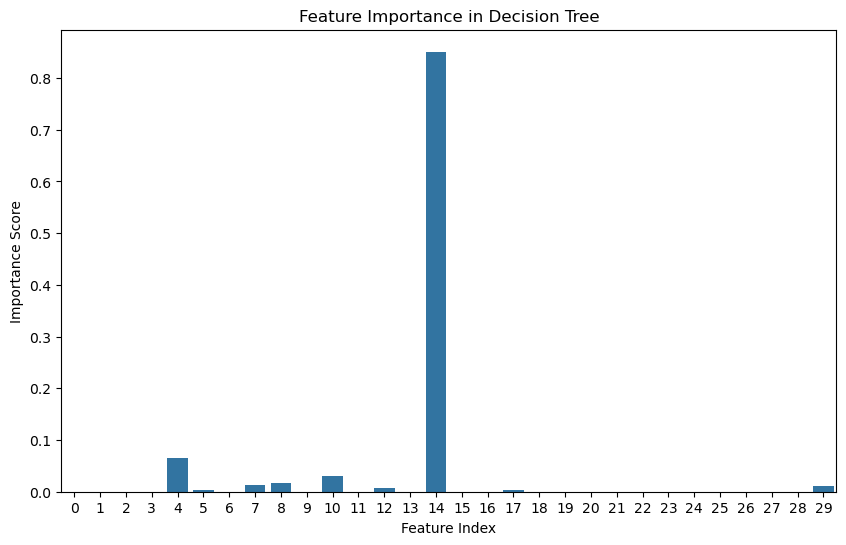

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("E:/BE MATERIAL/PROJECT BE/creditcard.csv")

# Checking for missing values
print("Missing Values:", df.isnull().sum().sum())

# Data distribution
print(df["Class"].value_counts())

# Splitting features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initializing and training Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Evaluating model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting feature importance
feature_importance = dt_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(feature_importance)), y=feature_importance)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Decision Tree")
plt.show()
